In [1]:
from cmath import sqrt
import numpy as np
from autograd import grad
import autograd.numpy as np1
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random
from scipy.optimize import BFGS,SR1
from scipy.optimize import Bounds
from scipy.optimize import NonlinearConstraint,LinearConstraint
import time

In [5]:

# Set parameters
n = 10
a = np.random.rand(1, n)
beta = 0.741271
e = np.array([i+1 for i in range(n)])
A = np.random.rand(n, n)
b = np.random.rand(n, 1)
alpha = 10 * np.random.rand(1, 1)  # Fix syntax: add * between 10 and np.random.rand

# Calculate L
while 2 * alpha <= 3 * (beta ** (3/2)) * np.sqrt(n):
    alpha = 10 * np.random.rand(1, 1)
    L = 4 * (beta ** (3/2)) * np.sqrt(n) + 3 * alpha  # Calculate L inside the loop to update with new alpha

# Print values for tracking
print(f"n = {n}")
print(f"a = {a}")
print(f"beta = {beta}")
print(f"e = {e}")
print(f"A = {A}")
print(f"b = {b}")
print(f"alpha = {alpha[0][0]}")  # Access the scalar value from the 2D array
print(f"L = {L[0][0]}")  # Access the scalar value from the 2D array


n = 10
a = [[0.71266671 0.04559606 0.88833412 0.22559554 0.08848552 0.70242301
  0.36037857 0.57843855 0.08675046 0.60430995]]
beta = 0.741271
e = [ 1  2  3  4  5  6  7  8  9 10]
A = [[0.49433964 0.21322701 0.62584244 0.40635311 0.03813177 0.51524521
  0.89773441 0.35966331 0.5844141  0.51609266]
 [0.26841875 0.88787133 0.10418605 0.34502668 0.07495092 0.99387262
  0.39453142 0.49739247 0.2445098  0.70782888]
 [0.07684918 0.99131216 0.43100186 0.34390328 0.66115283 0.7138377
  0.84484316 0.26848917 0.96690896 0.97738597]
 [0.93924689 0.63966337 0.7752586  0.51597005 0.08773268 0.4915426
  0.31757638 0.68691987 0.05870284 0.44206913]
 [0.0434356  0.97150405 0.00880086 0.88764753 0.58130425 0.08353449
  0.97701072 0.6447271  0.62179059 0.8483666 ]
 [0.59367495 0.82457439 0.63608524 0.98076014 0.47962745 0.19377555
  0.4699346  0.66239517 0.85287066 0.76651899]
 [0.81890483 0.46049558 0.00299334 0.92651336 0.87654339 0.74552252
  0.12772972 0.36244749 0.83855232 0.04509271]
 [0.02774178 0

In [6]:
def f(x):
    return np1.dot(a,x.T) + alpha*np1.dot(x,x.T) + (beta/np1.sqrt(1+beta*np1.dot(x,x.T)))*np1.dot(e,x.T)
def g1(x):
    return 1- np1.prod(x)
g1_dx = grad(g1)
f_dx = grad(f)
B = A.tolist()
C = b.reshape(1,n).tolist()[0]
nonlinear_constraint = NonlinearConstraint(g1, -np.inf, 0, jac=g1_dx, hess=BFGS())
# linear_constraint = LinearConstraint(B, C,[np.inf for i in range(n)])
# linear_constraint = LinearConstraint([[1 for i in range(n)]], 1,np.inf)
bounds = Bounds([0.0001 for i in range(n)], [np.inf for i in range(n)])


/home/codespace/.local/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:317: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)
/home/codespace/.local/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


[1.07058396 1.10634909 1.01389477 1.04724137 1.03750312 0.96867117
 0.97534564 0.93983568 0.95743588 0.90149126]
[[51.15331274]]
[1.07058582 1.10635087 1.01389674 1.04724326 1.03750505 0.96867323
 0.97534771 0.93983781 0.95743799 0.90149349]
[[51.15345864]]


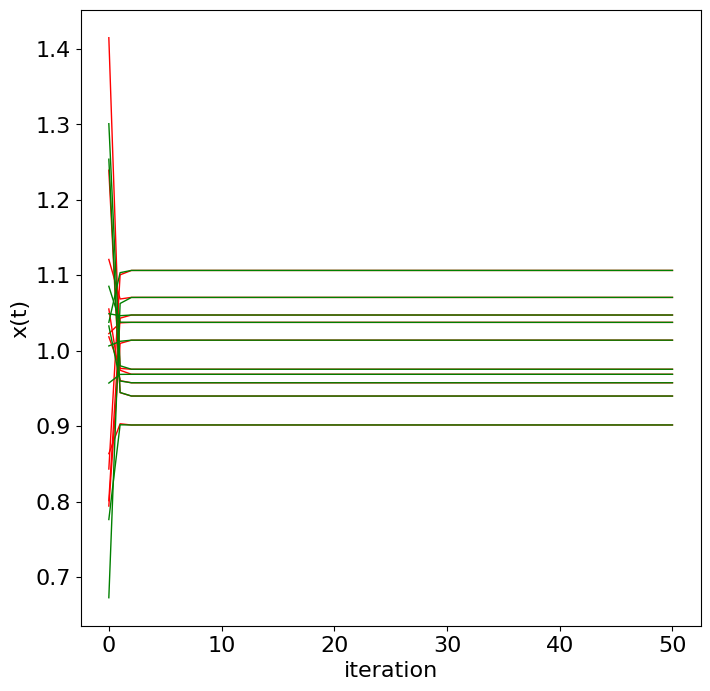

In [7]:
def rosen(x,y):
    """The Rosenbrock function"""
    return np.sqrt(np.sum((x-y)**2))
def find_min(y,n):
    x = np.random.rand(1,n).tolist()[0]
    #print(x)
    # res = minimize(rosen, x, args=(y), jac="2-point",
    #             constraints=cons,method='SLSQP', options={'disp': False},bounds=bounds)
    # res = minimize(rosen, x, args=(y), jac="2-point",hess=BFGS(),
    #             constraints=[linear_constraint,nonlinear_constraint],method='trust-constr', options={'disp': False},bounds = bounds)
    res = minimize(rosen, x, args=(y), jac="2-point",hess=BFGS(),
            constraints=[nonlinear_constraint],method='trust-constr', options={'disp': False},bounds = bounds)
    return res.x
def run_nonsmooth1(x, max_iters, f, f_dx,n):
    res = []
    val = []
    lda = 5/L
    sigma = 0.1 #100
    K = np.random.rand(1,1)
    res.append(x)
    val.append(f(x))
    x_pre = x
    for t in range(max_iters):
        y = x - lda*f_dx(x)
        x_pre = x.copy()
        x = find_min(y,n)
        if f(x) - f(x_pre) + sigma*(np.dot(f_dx(x_pre).T,x_pre - x)) <= 0:
            lda = lda
        else:
            lda = K*lda
        res.append(x)
        val.append(f(x))
    print(x)
    print(f(x))
    return res,val,x,f(x)
def plot_x(sol_all,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    colors = ['r','g','y','b','brown']
    for i in range(count):
        for j in range(n):
            plt.plot(t, sol_all[i][:,j],color=colors[i],linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('x(t)')
    #plt.legend([r'$x_{1}(t)$',r'$x_{2}(t)$']) #,r'$x_{3}(t)$',r'$x_{4}(t)$'
    plt.show()
#if __name__ == '__main__':
num = 2 # number of init points
max_iters = 50 # number of interations
max_iters1 = 50
sol_all,sol_all1 = [],[]
val_all,val_all1 = [],[]
count = 0
epsilon = 0.1
#n = 22 # dimension x
for i in range(num):
    x0 = np.random.rand(1,n)
    x0 = find_min(x0,n) # init point
    g1x = g1(x0)
    # g2x = g2(x0)
    # g3x = g3(x0)
    # g4x = g4(x0)
    # g5x = g5(x0)
    count += 1
    #res,val = run_nonsmooth1_nag(x0, max_iters, f, f_dx,n)
    res,val,x,_ = run_nonsmooth1(x0, max_iters, f, f_dx,n)
    tmp = np.array(res)[:,:]
    #tmp1 = np.array(res1)[:,:]
    sol_all.append(tmp)
    val_all.append(val)
    # sol_all1.append(tmp1)
    # val_all1.append(val1)
plot_x(sol_all,count,max_iters)

[1.07058398 1.10634912 1.01389476 1.04724138 1.03750312 0.96867114
 0.97534563 0.93983563 0.95743585 0.90149121]
[[51.15331178]]
[1.07058397 1.10634911 1.01389475 1.04724137 1.03750312 0.96867115
 0.97534562 0.93983565 0.95743586 0.90149122]
[[51.15331178]]


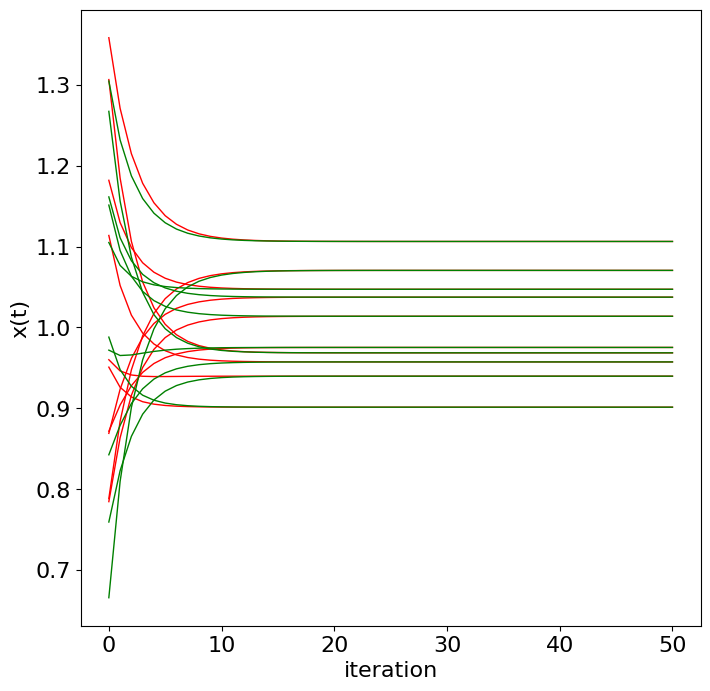

In [8]:
def rosen(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def find_min(y, n):
    x = np.random.rand(1, n).tolist()[0]
    res = minimize(rosen, x, args=(y), jac="2-point", hess=BFGS(),
                   constraints=[nonlinear_constraint], method='trust-constr', 
                   options={'disp': False}, bounds=bounds)
    return res.x

def run_nonsmooth1(x, max_iters, f, f_dx, n):
    res = []
    val = []
    lda = 1 / L  # Fixed step size
    sigma = 0.1
    res.append(x)
    val.append(f(x))
    x_pre = x
    for t in range(max_iters):
        y = x - lda * f_dx(x)
        x_pre = x.copy()
        x = find_min(y, n)
        res.append(x)
        val.append(f(x))
    print(x)
    print(f(x))
    return res, val, x, f(x)

def plot_x(sol_all, count, max_iters):
    t = [i for i in range(max_iters + 1)]
    plt.figure(figsize=(8, 8))
    plt.rcParams.update({'font.size': 16})
    colors = ['r', 'g', 'y', 'b', 'brown']
    for i in range(count):
        for j in range(n):
            plt.plot(t, sol_all[i][:, j], color=colors[i], linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('x(t)')
    plt.show()

# Main execution
num = 2  # number of init points
max_iters = 50  # number of iterations
max_iters1 = 50
sol_all, sol_all1 = [], []
val_all, val_all1 = [], []
count = 0
epsilon = 0.1

for i in range(num):
    x0 = np.random.rand(1, n)
    x0 = find_min(x0, n)  # init point
    g1x = g1(x0)
    count += 1
    res, val, x, _ = run_nonsmooth1(x0, max_iters, f, f_dx, n)
    tmp = np.array(res)[:, :]
    sol_all.append(tmp)
    val_all.append(val)
plot_x(sol_all, count, max_iters)